# Medical insurance

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load csv file 
df = pd.read_csv('../datasets/insurance.csv', index_col=False)

# Explanatory analysis
***
## Overview

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Response variable
### Charges

Text(0.5, 1.0, 'Distribution of Charges')

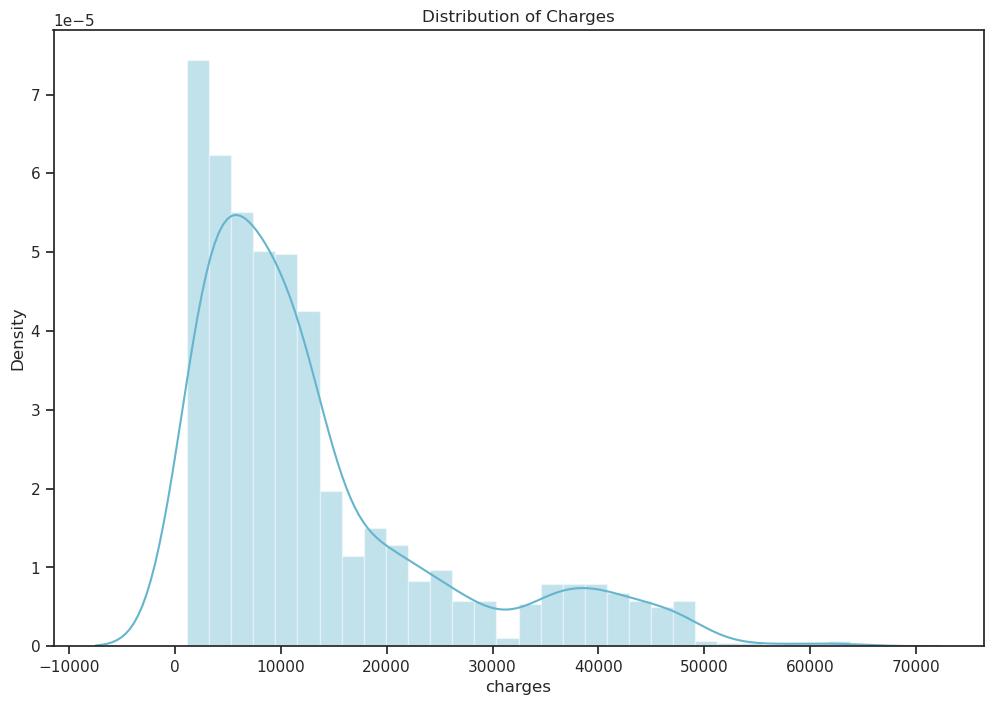

In [25]:
sns.set(style='ticks')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

### Age 

Text(0.5, 1.0, 'Distribution of Age')

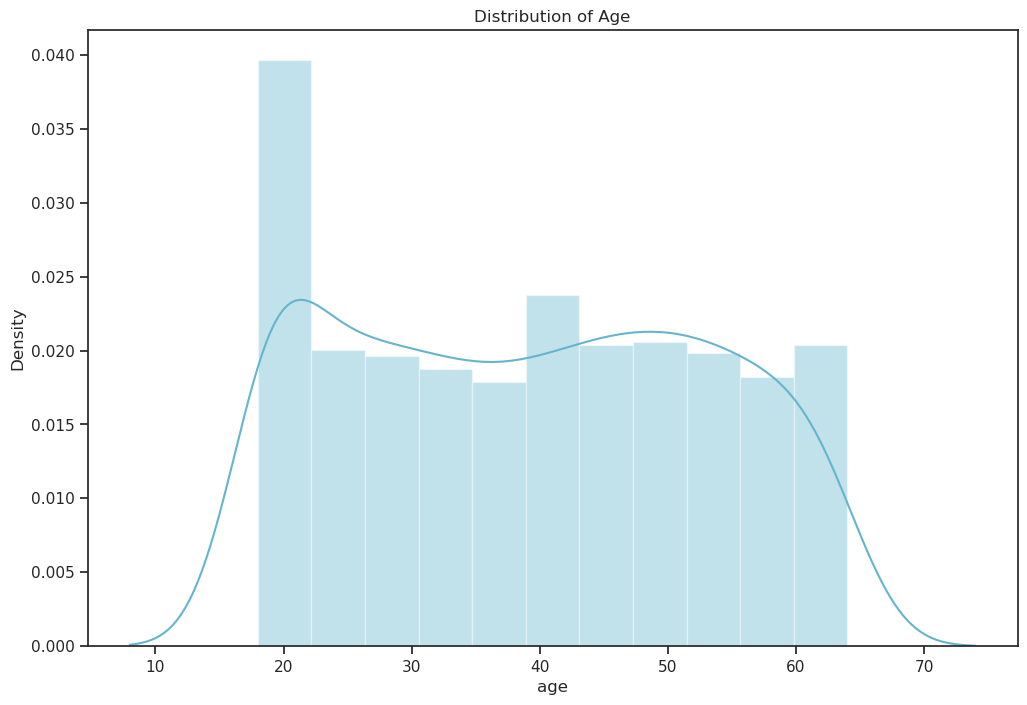

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of Age')

In [27]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Sex

In [28]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [29]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

<AxesSubplot:xlabel='sex', ylabel='count'>

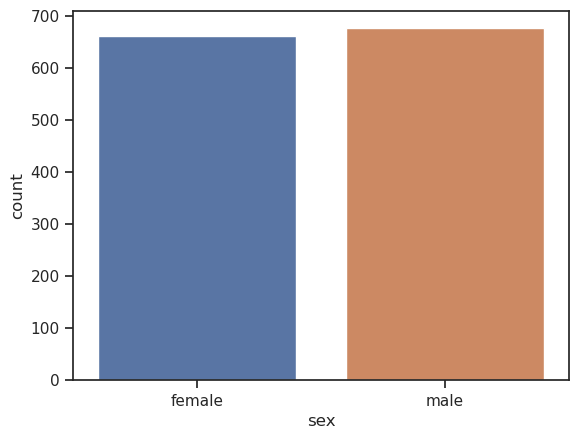

In [30]:
sns.countplot(x="sex", data=df)

In [31]:
df['sex']= le.fit_transform(df['sex'])
df['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


### BMI

In [32]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

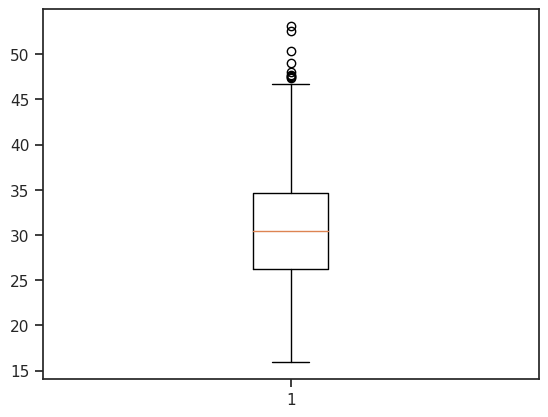

In [33]:
plt.boxplot(df['bmi'])
plt.show()

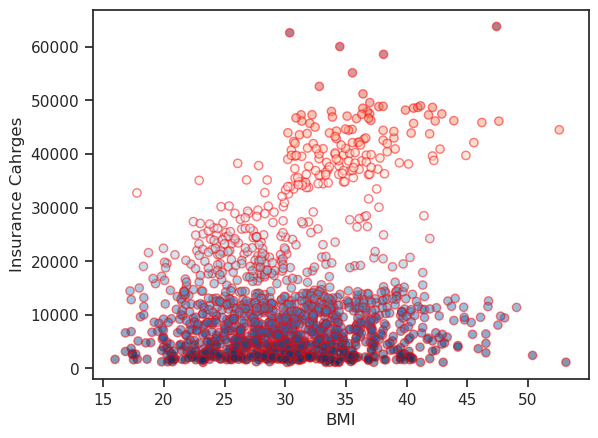

In [34]:
plt.scatter(df['bmi'],df['charges'],c=df['charges'], cmap = "RdBu_r", edgecolor = "Red",alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Insurance Cahrges")
plt.show()

### Children

Text(0.5, 1.0, 'Distribution of children')

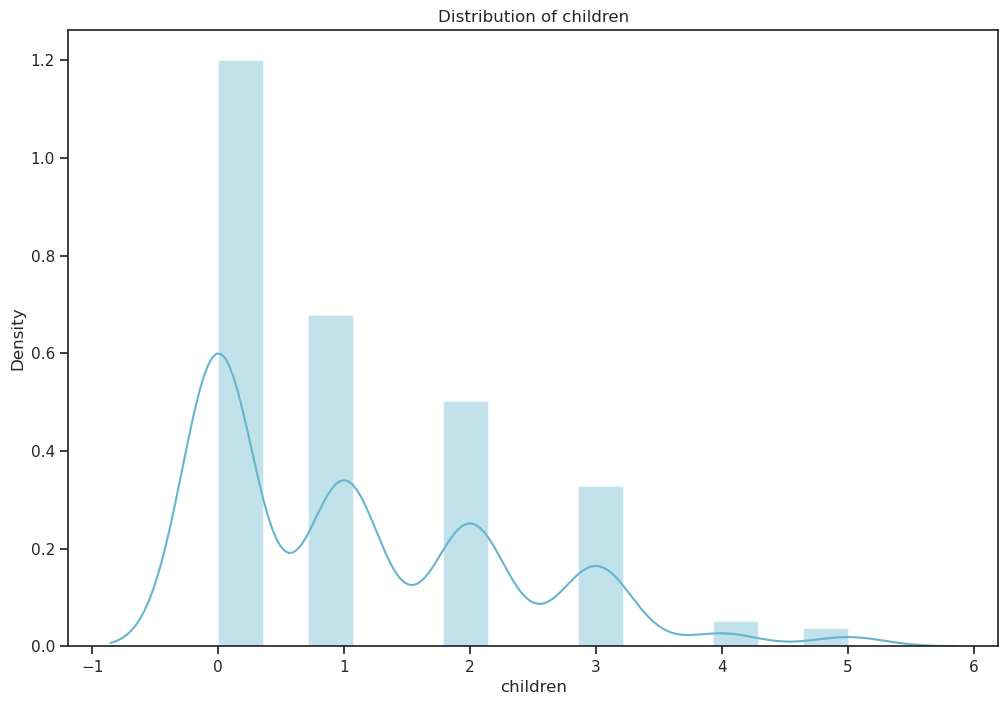

In [35]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['children'], kde = True, color = 'c')
plt.title('Distribution of children')

In [36]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [37]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

### Smoker

In [38]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [39]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

<AxesSubplot:xlabel='smoker', ylabel='count'>

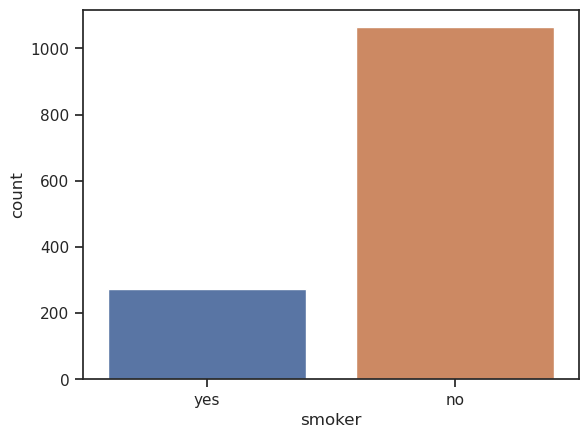

In [40]:
sns.countplot(x="smoker", data=df)

In [41]:
df['smoker']= le.fit_transform(df['smoker'])
df['smoker'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: smoker
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


### Regions

In [42]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [43]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

<AxesSubplot:xlabel='region', ylabel='count'>

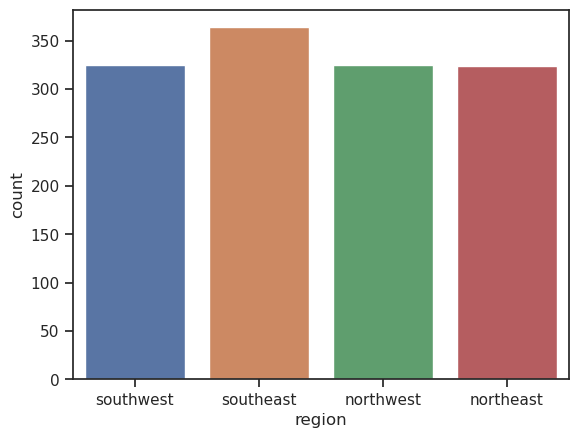

In [44]:
sns.countplot(x="region", data=df)

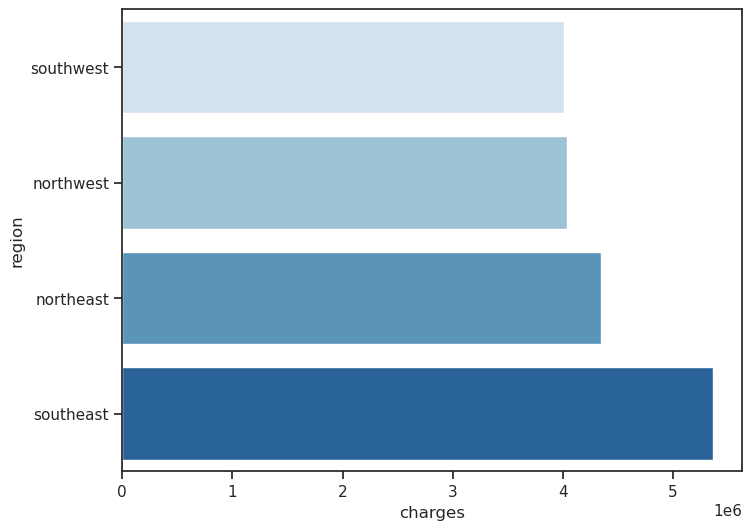

In [45]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

In [46]:
df['region']= le.fit_transform(df['region'])
df['region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: region
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


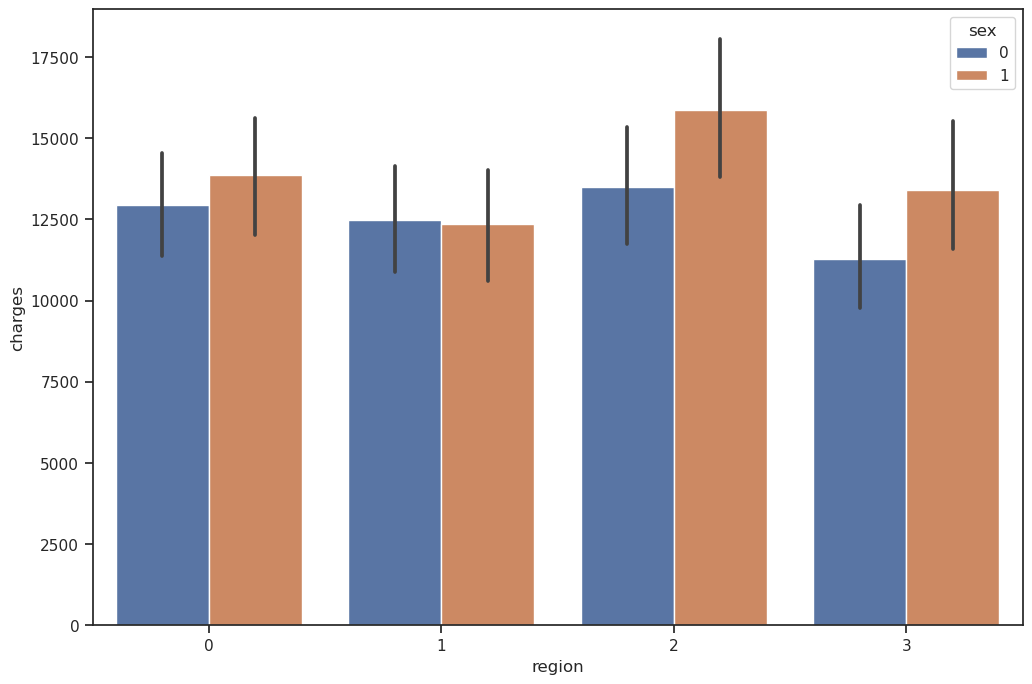

In [47]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

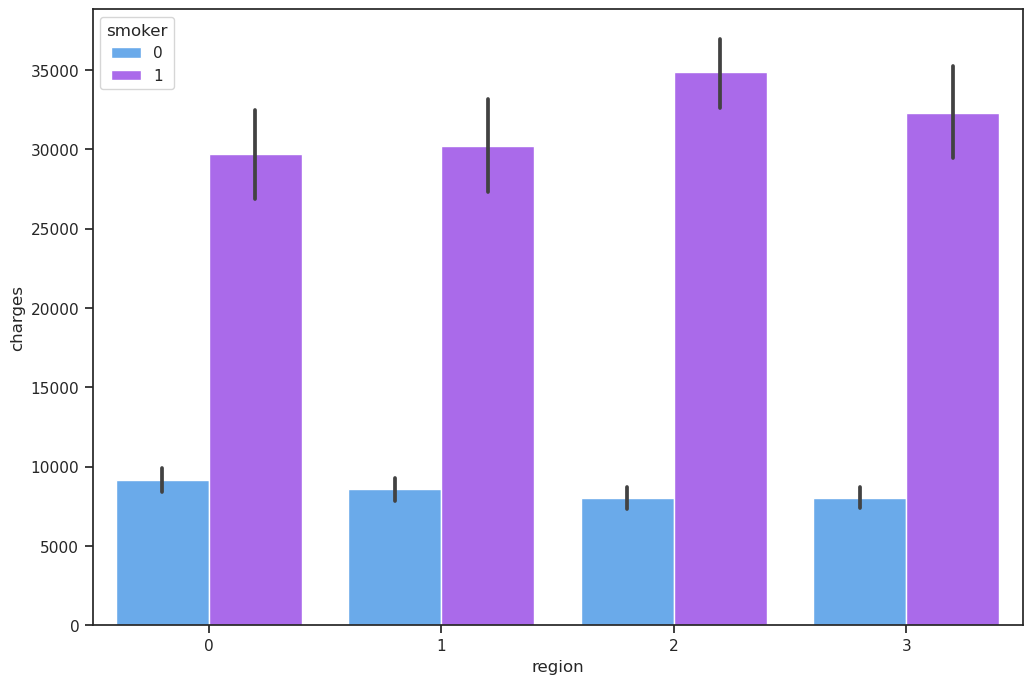

In [48]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='cool')

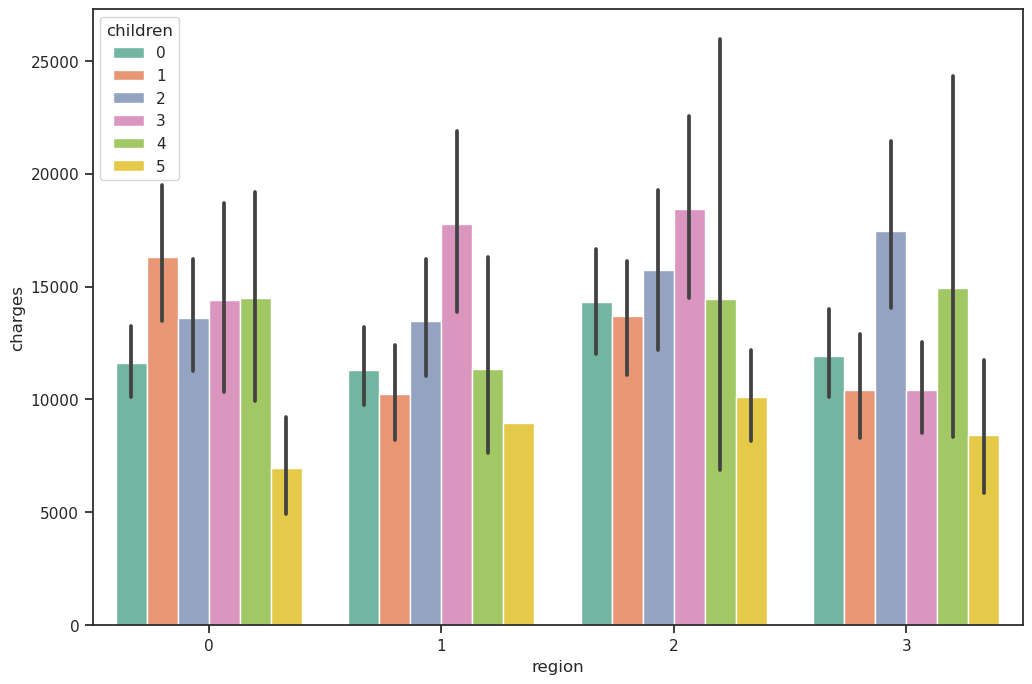

In [49]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

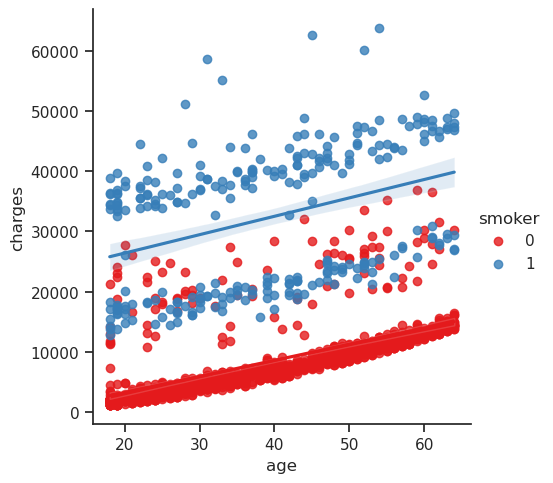

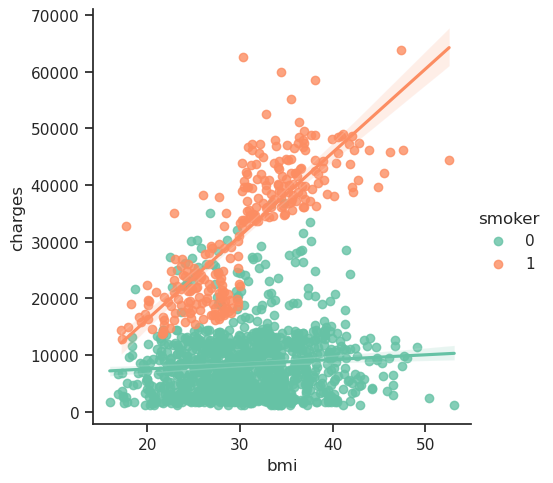

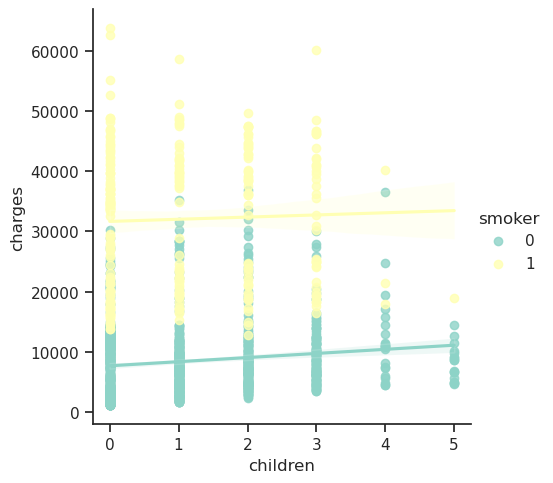

In [50]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


<AxesSubplot:>

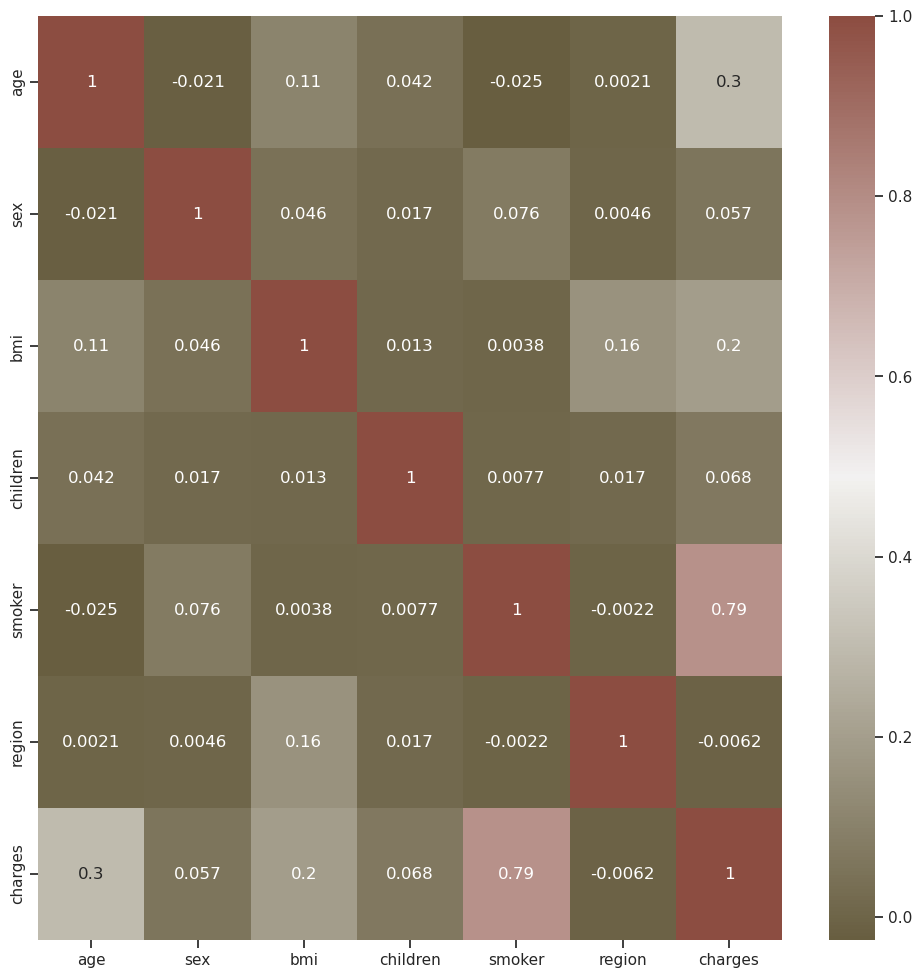

In [51]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [52]:
# assign numeriscal label to y
y = df['charges']
X = df.drop('charges', axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


<AxesSubplot:>

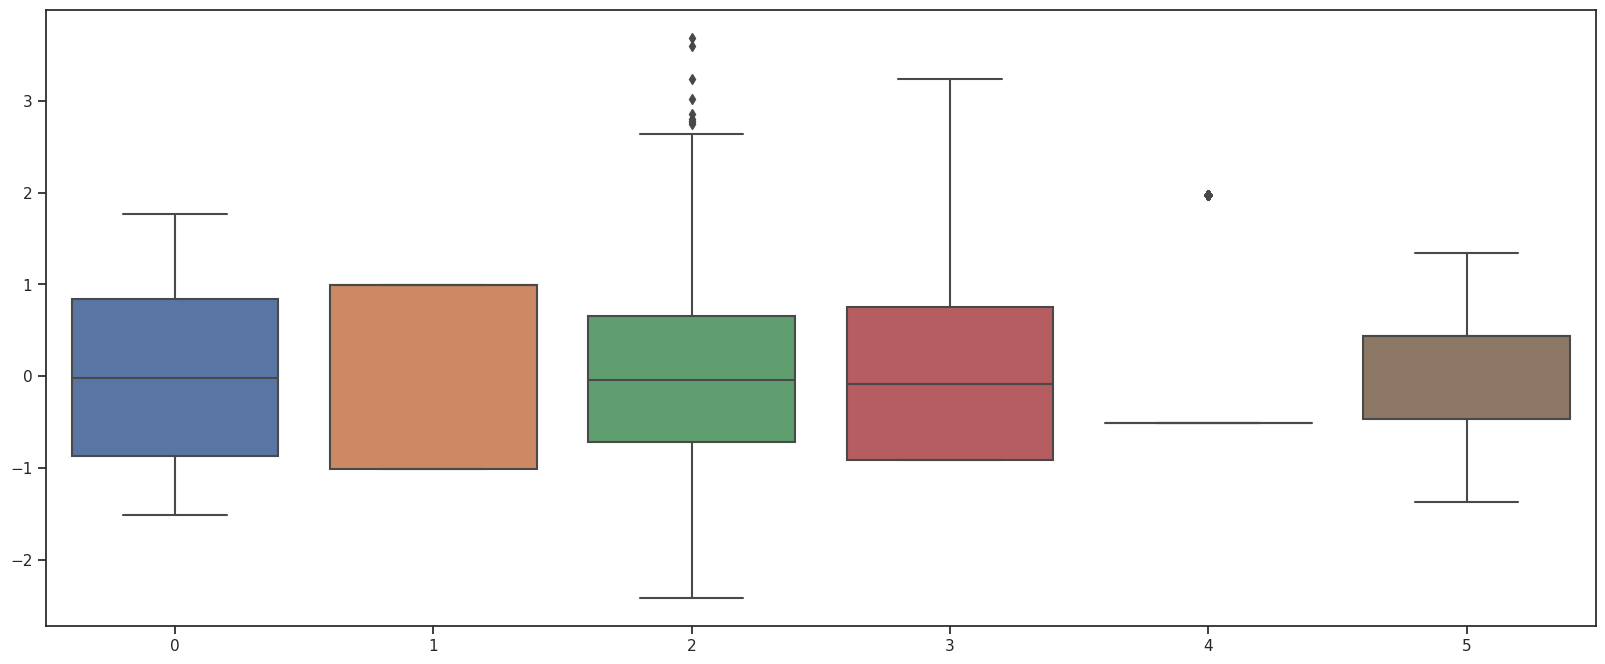

In [53]:
# Normalise the features to use zero mean normalisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X, ax=ax)

## Model

In [54]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [55]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [57]:
learning_rates=[0.1,0.01,0.001,0.0001]

In [58]:
def hypTune(X_train, y_train, X_val, y_val):
    scores = []
    for lr in learning_rates:
        linReg = LinearRegression(lr)
        linReg.fit(X_train, y_train)
        predict = linReg.predict(X_val)
        acc = mean_squared_error(y_val, predict)
        scores.append(acc)
    return scores

In [59]:
scores = hypTune(X_train, y_train, X_val, y_val)
scores

[33156834.822997782, 33156834.82299788, 33157252.82098726, 78434044.28746942]

In [60]:
model=LinearRegression(0.01)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, predict)
print("MSE:", mse)
print("RMSE", math.sqrt(mse))

MSE: 36794223.34351691
RMSE 6065.82420974404


In [62]:
X_reduced = df.drop('sex', axis=1)
X_reduced = X_reduced.drop('children', axis=1)
X_reduced = X_reduced.drop('region', axis=1)
X_reduced.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [67]:
Xr_train, Xr_reduced_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.3, random_state=1)

In [68]:
model=LinearRegression(0.01)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, predict)
print("MSE:", mse)
print("RMSE", math.sqrt(mse))

MSE: 36794223.34351691
RMSE 6065.82420974404
